In [1]:
using Pkg
Pkg.activate(".")
using Plots # Let's use the default plotting library
using LaTeXStrings # add's L"strings" so we can use LaTeX math stuff in labels

Activating environment at `C:\Users\tim\Documents\ensc481-2020-examples\Julia\plotting\Project.toml`


In [2]:
x = LinRange(-2,4,200) # Like Matlab's linspace

200-element LinRange{Float64}:
 -2.0,-1.96985,-1.9397,-1.90955,-1.8794,…,3.8794,3.90955,3.9397,3.96985,4.0

now let's assume we want to plot a function

In [3]:
f(x,β) = cos(β*x)*sin(3*β*x + 1)

f (generic function with 1 method)

Note, I didn't have to include the periods on each binary operator.  Instead I can use a period when I call the function `f`

In [4]:
f.([1,1.5,3], √π )

3-element Array{Float64,1}:
 -0.006843948752659984
 -0.38421709824394895 
 -0.5386614859122603  

In [5]:
y = f.(x, 2);

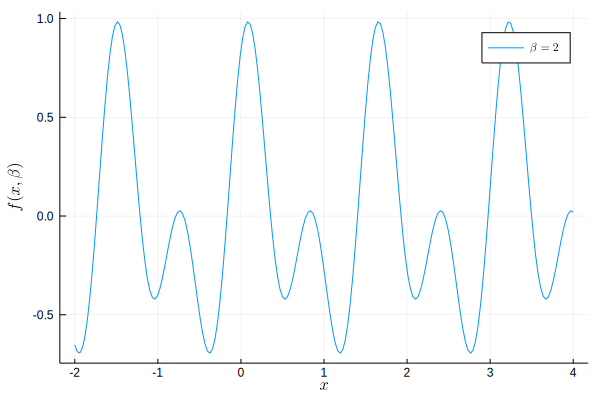

In [6]:
plt = plot( x, y, 
    xlabel = L"x",
    ylabel = L"f(x,\beta)",
    label = L"\beta = 2")

Now I'll add a second line to the graph (which I should do in the cell above, but I want to illustrate I don't have to).  Note I used the `!` version of `plot` to indicate an inplace change to the current plot.  Also, I've added the optional argument `plt` (saved from before) to explicitly modify the previous plot.  We could have multiple plots and interact with them however/whenever we need to using this type of pattern.

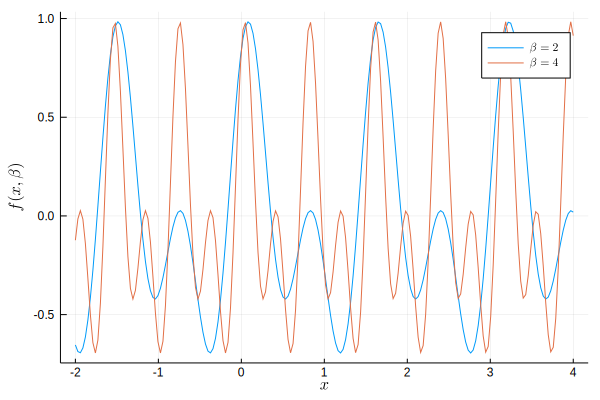

In [7]:
plot!(plt, x, f.(x,4), label = L"\beta = 4")

Another fun part to this example is that `plot` also takes functions as input, similar to `fplot` in Matlab.  It has a relatively nice way to pick points, so it'll make a better looking plot (usually) than simply picking equally spaced points.  The arguements for `plot` are a little different this time so be careful.  I specify the function, the lower edge of the domain, and the upper edge of the domain.

I'll use an annonymous function similar to the `@` functions in Matlab.  Here we use `x->f(x)` instead of `@(x) f(x)`.  This lets us hold $\beta$ fixed and map our function `f` of two variables into a function of a single variable.  

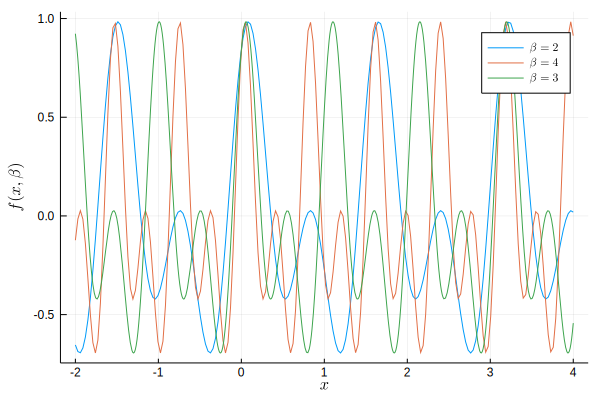

In [8]:
plot!(plt, t->f(t,3), x[1], x[end], label = L"\beta = 3")

## Log plots
Now let's make a log plot.  I'll use points for some, and functions for others just to mix it up.  Usually you'll just use one for a given plot.

In [9]:
G(s,ζ) = 1/(s^2 + 2*ζ*s + 1)
M(ω,ζ) = 20*log10( abs(G(1im*ω, ζ)) )
ωr = 10 .^ LinRange(-1, 1, 200) # like logspace in Matlab
;

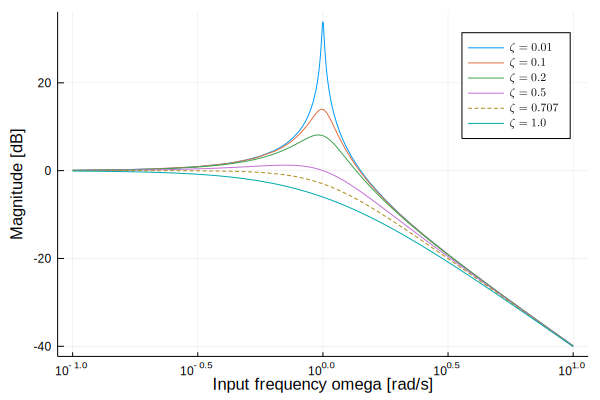

In [10]:
plt2 = plot( t->M(t,0.01), ωr[1], ωr[end],
             xscale = :log10,
            label = L"\zeta = 0.01")
plot!( plt2, t->M(t, 0.1),ωr[1],ωr[end], label = L"\zeta = 0.1")
plot!( plt2, ωr, M.(ωr, 0.2), label = L"\zeta = 0.2")
plot!( plt2, ωr, M.(ωr, 0.5), label = L"\zeta = 0.5")
plot!( plt2, ωr, M.(ωr, 1/sqrt(2)), line=:dash, label = L"\zeta = 0.707")
plot!( plt2, ωr, M.(ωr, 1), label = L"\zeta = 1.0")
plot!( plt2, xlabel="Input frequency omega [rad/s]", 
    ylabel="Magnitude [dB]" )

We know (or at least we can determine) from analysis that the peak happens when $$\omega_p = \sqrt{1-2\zeta^2}$$
So we can use composition and also include the peak curve on the magnitude plot.

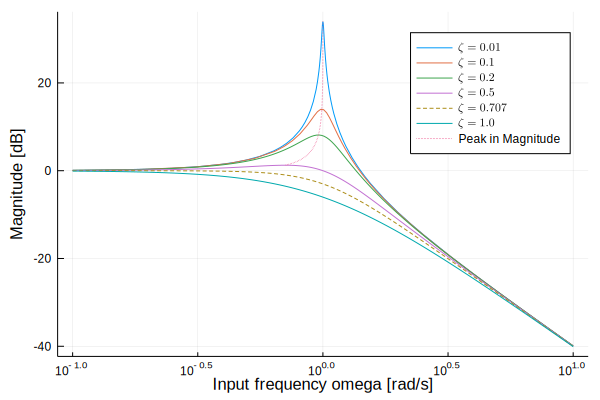

In [11]:
ωp(ζ) = sqrt(1-2*ζ^2)
plot!(plt2, ωp, ζ->M.(ωp(ζ),ζ), 0.01, 0.5,
    line=:dot,
    label="Peak in Magnitude")